In [1]:
# first I think I need some histograms of the SNR>50 single stars
# then I can see if I need the figure or just ranges.

import pandas as pd
import gaia_spectrum
%pylab inline

# load single star data
elbadry_singles_metrics = pd.read_csv('./data/label_dataframes/elbadry_singles_labels.csv')
elbadry_singles_flux = pd.read_csv('./data/gaia_rvs_dataframes/elbadry_singles_flux.csv')
elbadry_singles_sigma = pd.read_csv('./data/gaia_rvs_dataframes/elbadry_singles_sigma.csv')
single_metric_df = pd.read_csv('./data/binary_metric_dataframes/s2_emp/single_metrics.csv')

# load binary data
elbadry_binaries_labels = pd.read_csv('./data/label_dataframes/elbadry_tableE3_binaries_labels.csv')
elbadry_binaries_flux = pd.read_csv('./data/gaia_rvs_dataframes/elbadry_tableE3_binaries_flux.csv')
elbadry_binaries_sigma = pd.read_csv('./data/gaia_rvs_dataframes/elbadry_tableE3_binaries_sigma.csv')
binary_metric_df = pd.read_csv('./data/binary_metric_dataframes/s2_emp/binary_metrics.csv')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0, 'Ca triplet $\\chi^2$')

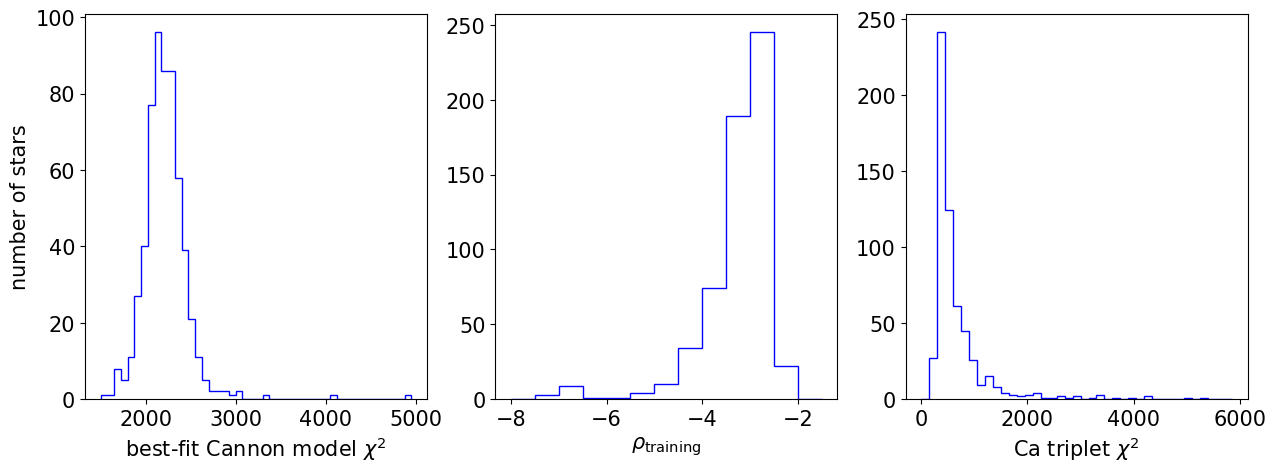

In [2]:
# I think this looks good!
# and I think I'll show the SNR>50 ones
rcParams['font.size']=15
figure(figsize=(15,5))
subplot(131)
single_chisq_bins = np.arange(1500,5000,75)
# hist(single_metric_df.single_fit_chisq, density=True, alpha=0.5)
hist(single_metric_df.single_fit_chisq, 
     bins=single_chisq_bins, histtype='step', color='b')
xlabel(r'best-fit Cannon model $\chi^2$')
ylabel('number of stars')

subplot(132)
training_density_bins = np.arange(-8,-1,0.5)
# hist(np.log10(single_metric_df.single_fit_training_density),
#               density=True, alpha=0.5)
hist(np.log10(single_metric_df.single_fit_training_density),
              bins=training_density_bins, histtype='step', color='b')
xlabel(r'$\rho_{\rm training}$')

subplot(133)
ca_resid_bins = np.arange(1,6000,150)
# hist(single_metric_df.single_fit_ca_resid, density=True, alpha=0.5)
hist(single_metric_df.single_fit_ca_resid, 
     bins=ca_resid_bins, histtype='step', color='b')
xlabel(r'Ca triplet $\chi^2$')

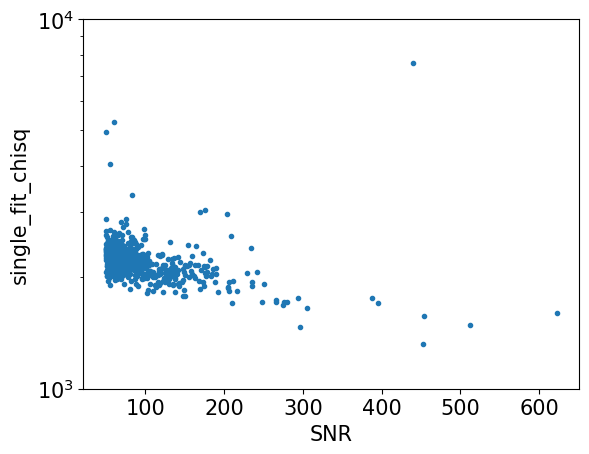

In [3]:
plot(single_metric_df.rvs_spec_sig_to_noise, single_metric_df.single_fit_chisq,'.' )
xlabel('SNR');ylabel('single_fit_chisq')
ylim(1000,10000)
yscale('log')
#yticks(np.linspace(1e3,1e4,10), labels=np.linspace(1e3,1e4,10))

Text(0, 0.5, 'delta_chisq')

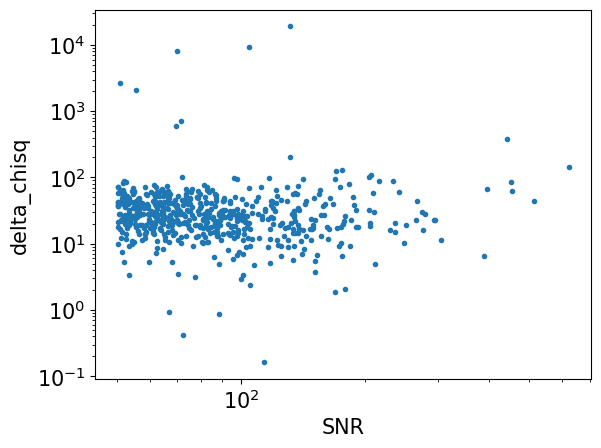

In [4]:
loglog(single_metric_df.rvs_spec_sig_to_noise, single_metric_df.delta_chisq,'.' )
#plt.yscale('log')
xlabel('SNR');ylabel('delta_chisq')

Text(0, 0.5, 'delta_chisq')

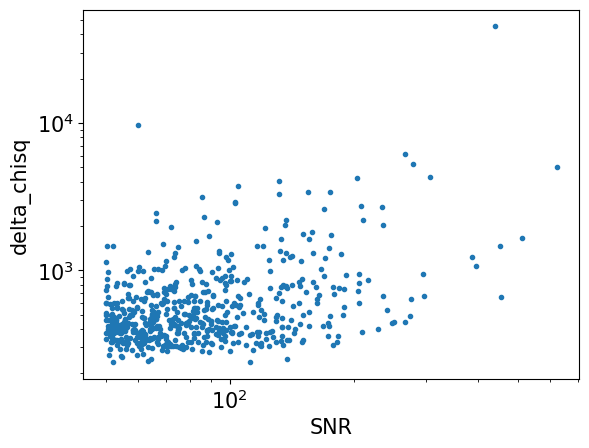

In [5]:
loglog(single_metric_df.rvs_spec_sig_to_noise, single_metric_df.single_fit_ca_resid,'.' )
#plt.yscale('log')
xlabel('SNR');ylabel('delta_chisq')

In [6]:
# next I want to find some example spectra to plot
# I already have the active dwarf and the evolved star

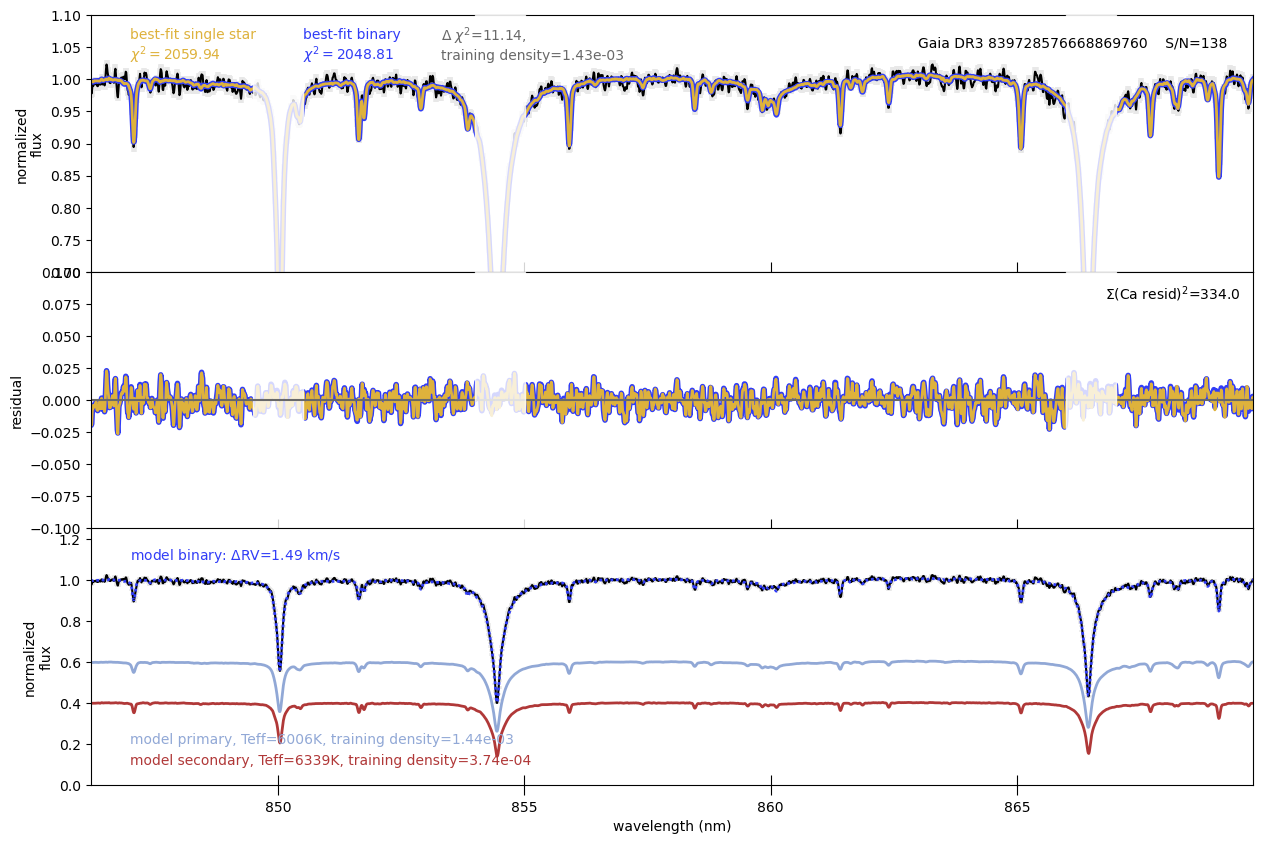

In [7]:
# single star spectrum
import gaia_spectrum
single_spec_source_id = 839728576668869760
single_spec = gaia_spectrum.GaiaSpectrum(
    single_spec_source_id,
    elbadry_singles_flux[str(single_spec_source_id)],
    elbadry_singles_sigma[str(single_spec_source_id)])
single_spec.plot()

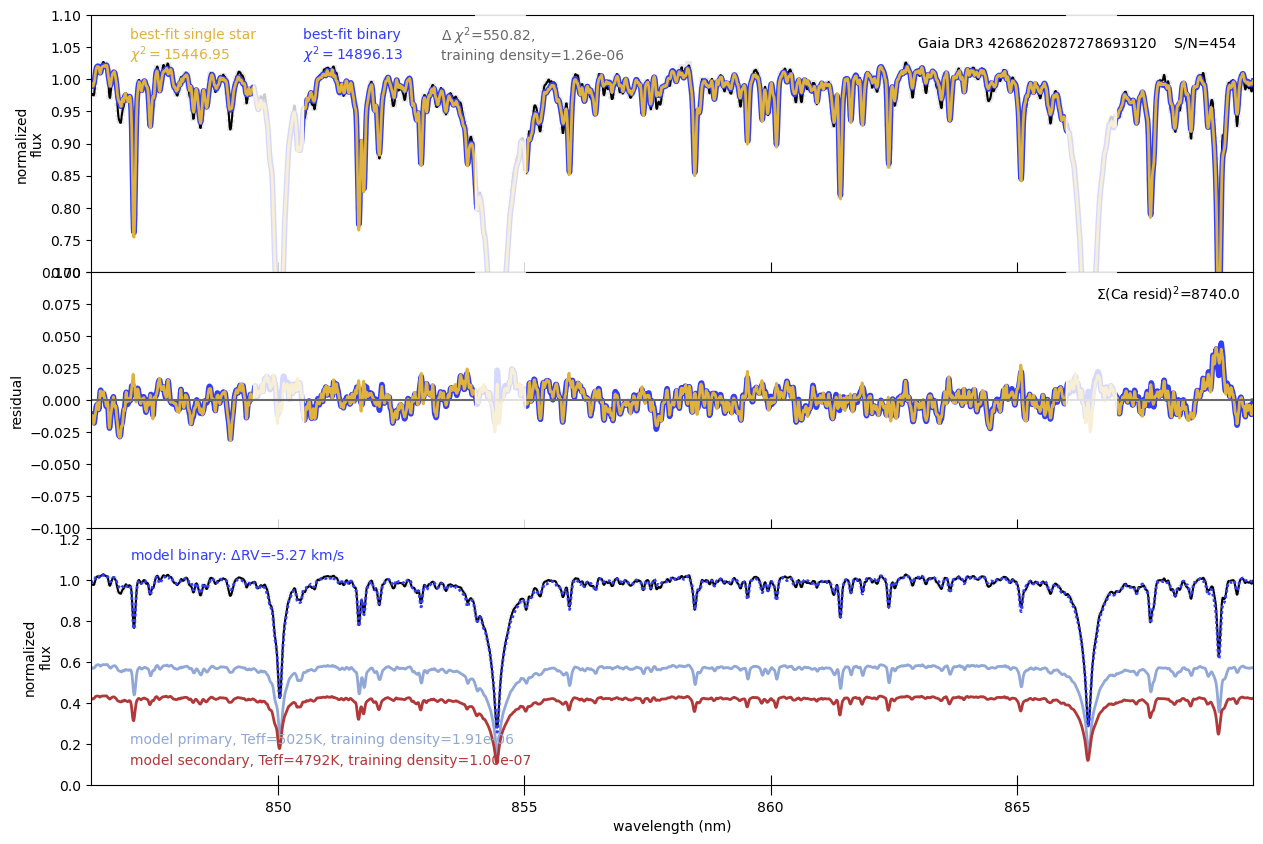

In [8]:
evolved_star_df = pd.read_csv('./data/individual_rvs_spectra/evolved_star_rvs.csv')
evolved_star_spec = gaia_spectrum.GaiaSpectrum(
    evolved_star_df.source_id[0],
    np.nan_to_num(evolved_star_df.flux[20:-20],1),
    np.nan_to_num(evolved_star_df.flux_error[20:-20],1))
evolved_star_spec.plot()

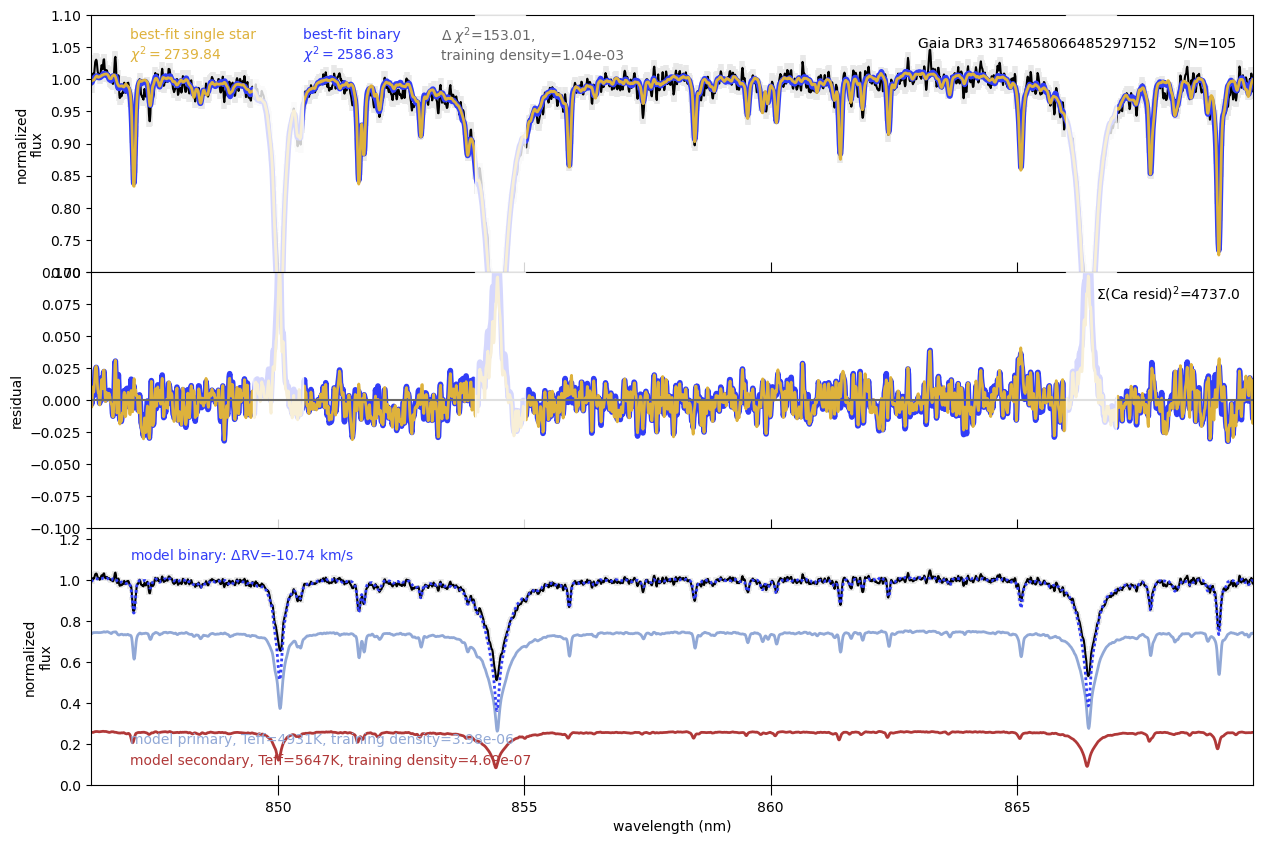

In [9]:
active_dwarf_df = pd.read_csv('./data/individual_rvs_spectra/active_dwarf_rvs.csv')
active_dwarf_spec = gaia_spectrum.GaiaSpectrum(
    active_dwarf_df.source_id[0],
    active_dwarf_df.flux[20:-20],
    active_dwarf_df.flux_error[20:-20])
active_dwarf_spec.plot()

In [10]:
elbadry_singles_metrics.sort_values(by='rvs_spec_sig_to_noise')

,Unnamed: 0,apogee_id,source_id,DESIGNATION,type,rvs_spec_sig_to_noise,ra,dec,non_single_star,ruwe,...,radial_velocity,radial_velocity_error,rv_nb_transits,phot_g_mean_mag,bp_rp,grvs_mag,grvs_mag_error,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper
111,120,2M18473769-3007257,6761344504755241088,Gaia DR3 6761344504755241088,single,50.114094,281.907151,-30.123823,0,0.945992,...,-21.160260,0.336845,6,10.481868,0.750759,9.837135,0.014448,247.0364,245.6911,248.1209
228,248,2M11170614+0835032,3818753829164338176,Gaia DR3 3818753829164338176,single,50.135240,169.275338,8.584264,0,0.927118,...,-3.772496,0.413383,13,11.563939,1.499898,10.450785,0.072091,78.8315,78.7206,78.9292
456,495,2M14064792+0240329,3667457460065176704,Gaia DR3 3667457460065176704,single,50.142334,211.699481,2.675697,0,1.000063,...,-33.217514,0.500914,11,11.069596,0.838910,10.390423,0.009930,229.6183,228.6381,230.6572
514,556,2M15361812+4248210,1391113935508873216,Gaia DR3 1391113935508873216,single,50.143387,234.075257,42.805520,0,0.999974,...,-50.381496,0.464518,25,11.761497,1.189007,10.838143,0.026059,132.6540,132.4619,132.8382
576,623,2M15034717+2033342,1261188597823895808,Gaia DR3 1261188597823895808,single,50.173050,225.946583,20.559580,0,1.367717,...,7.454939,0.788538,24,11.599967,0.719523,10.984601,0.016670,287.5097,285.5659,289.4340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,189,2M17492064-2322091,4068669940350598400,Gaia DR3 4068669940350598400,single,440.062070,267.335966,-23.369357,0,1.113438,...,-8.651742,1.658420,31,7.740193,0.411408,7.360068,0.004828,112.6033,111.2731,116.7684
99,107,2M09055098+3826202,719021574535141120,Gaia DR3 719021574535141120,single,452.418060,136.461529,38.438747,0,1.001919,...,-7.255555,0.127428,27,7.718396,0.628162,7.164338,0.005942,66.7421,66.6310,66.8602
60,66,2M12323053+5658347,1571720849358558464,Gaia DR3 1571720849358558464,single,454.297580,188.127095,56.975801,0,0.876689,...,-9.247917,0.124970,33,7.986863,0.749773,7.365319,0.007362,62.6784,62.5936,62.7779
566,612,2M17390067-2824450,4060239400532063232,Gaia DR3 4060239400532063232,single,512.203060,264.752399,-28.412893,0,0.826371,...,-2.227065,0.131139,29,7.560455,0.621508,7.002462,0.004511,73.3354,72.3638,73.7890


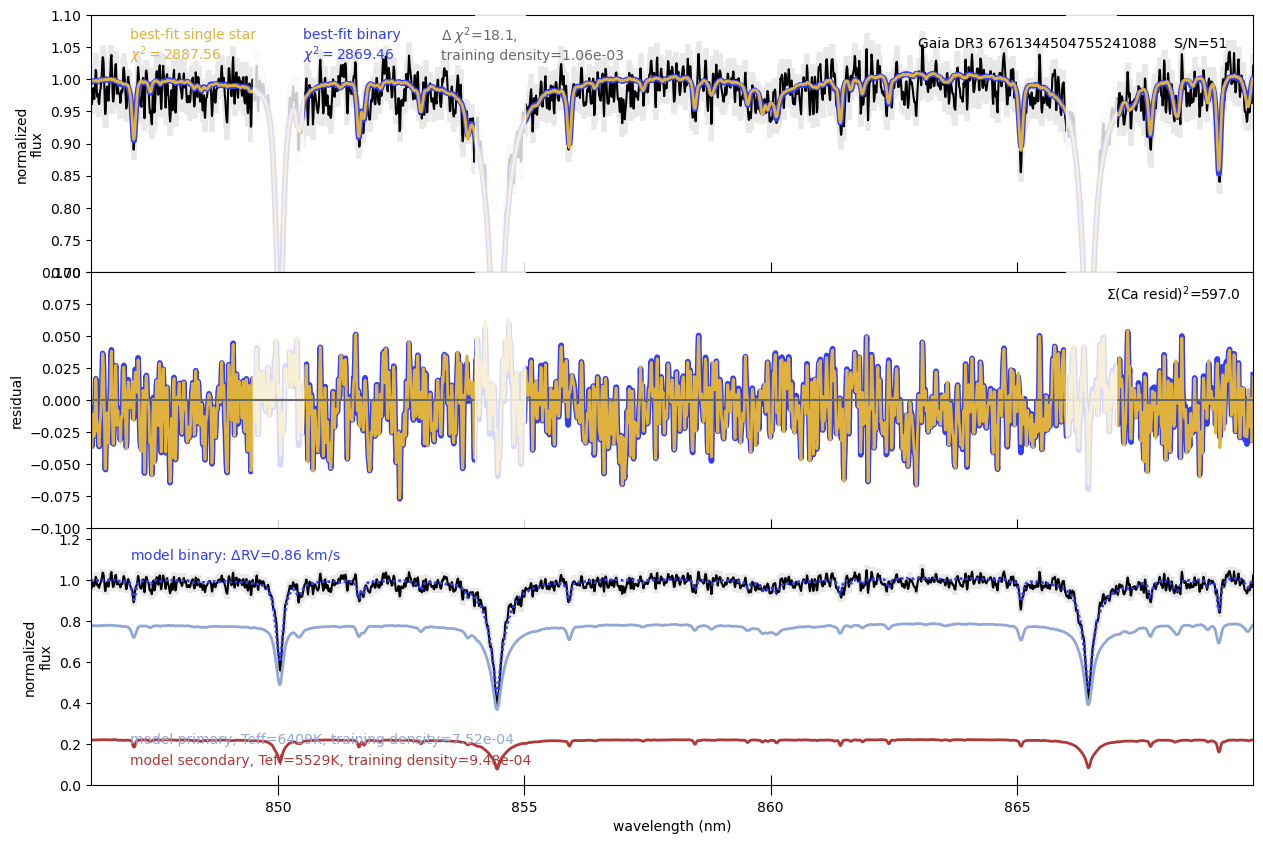

In [11]:
# here is a noisy spectrum
# note: this isn't really noisy enough, I'll need another one eventually
noisy_spec_source_id = 6761344504755241088
noisy_spec = gaia_spectrum.GaiaSpectrum(
    noisy_spec_source_id,
    elbadry_singles_flux[str(noisy_spec_source_id)],
    elbadry_singles_sigma[str(noisy_spec_source_id)])
noisy_spec.plot()

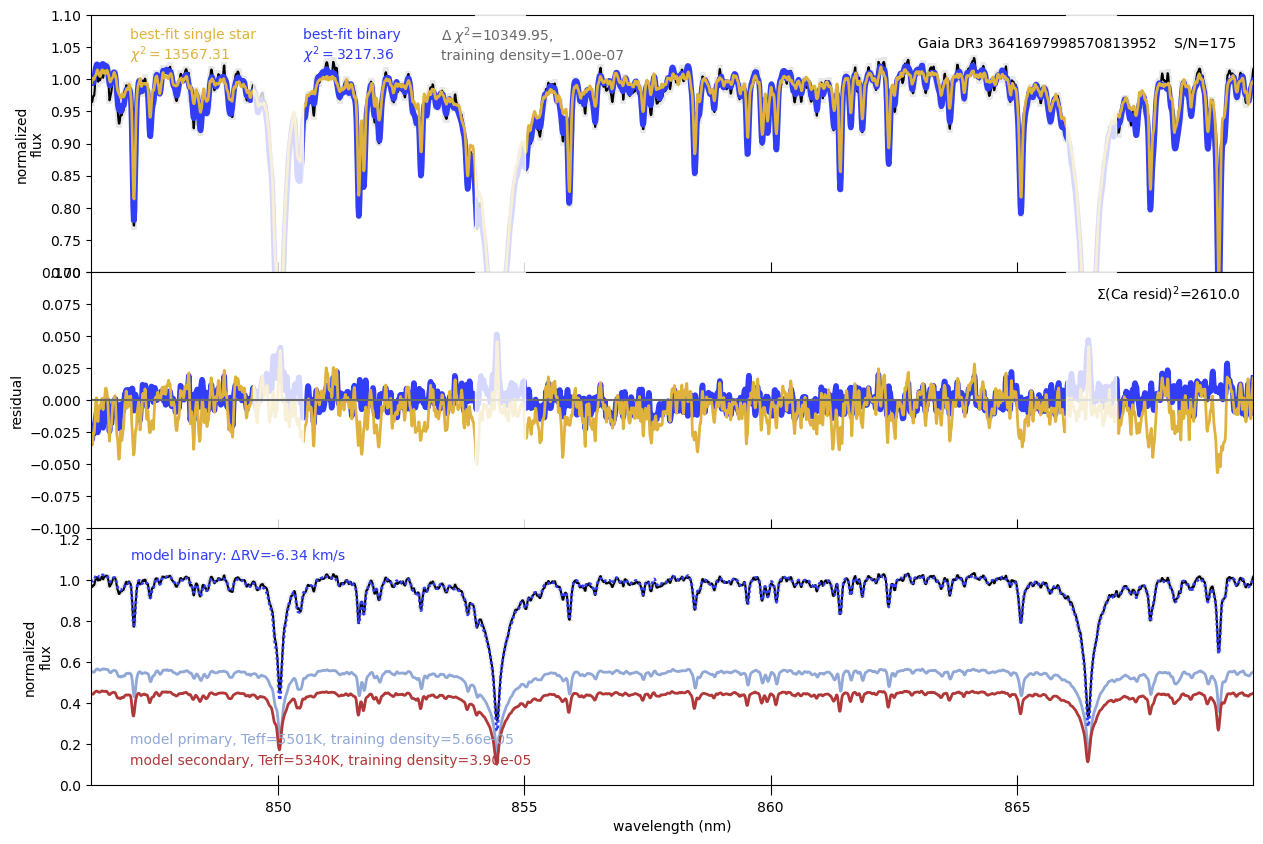

In [12]:
# I need a binary spectrum
# I'm going to use the one from SPOCS
binary_spec_source_id = 3641697998570813952
spocs_flux = pd.read_csv('./data/gaia_rvs_dataframes/spocs_flux.csv')
spocs_sigma = pd.read_csv('./data/gaia_rvs_dataframes/spocs_sigma.csv')

binary_spec = gaia_spectrum.GaiaSpectrum(
    binary_spec_source_id,
    spocs_flux[str(binary_spec_source_id)],
    spocs_sigma[str(binary_spec_source_id)])
binary_spec.plot()

In [13]:
# okay great, now I have the oddball spectra. 
# I just need a figure for them.
# where I essentially plot all their spectra
# and then plot their stats
oddball_spectra = [single_spec, evolved_star_spec, binary_spec, noisy_spec, active_dwarf_spec]

Text(0.5, 0, 'wavelength (nm)')

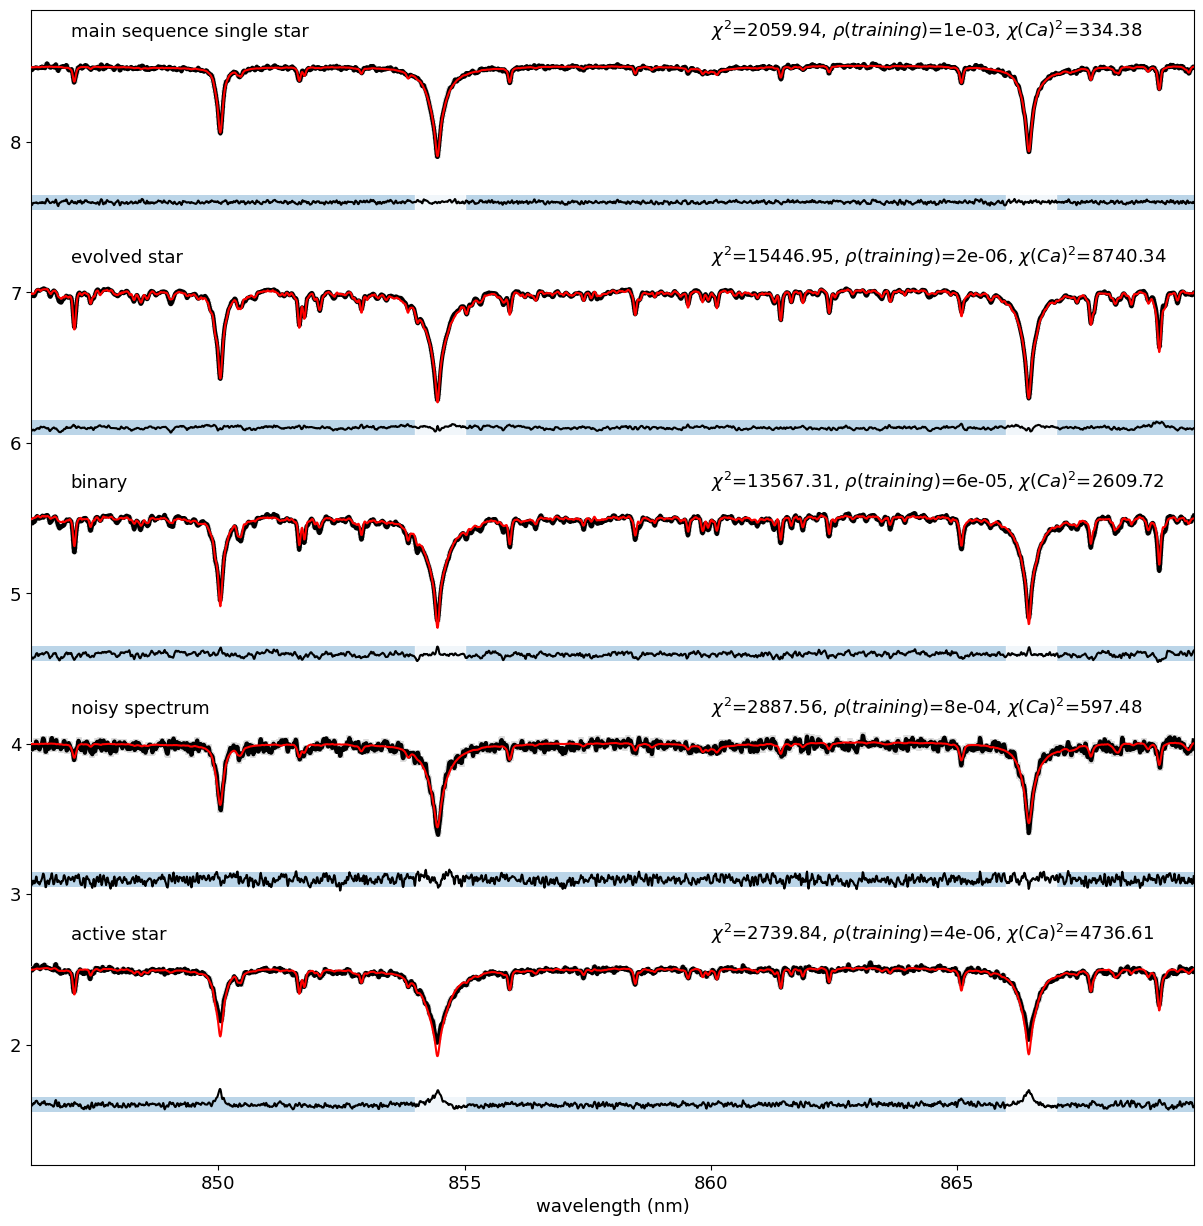

In [14]:
# I just need to plot the stats
# then I'll be done for now
oddball_labels = ['main sequence single star', 'evolved star', 
                  'binary', 'noisy spectrum', 'active star']

rcParams['font.size']=13
figure(figsize=(15,15))
for n in range(len(oddball_spectra)):
    oddball_spec = oddball_spectra[n]
    scale = 1.5*(5-n)
    errorbar(gaia_spectrum.custom_model.w, oddball_spec.flux+scale, yerr=oddball_spec.sigma, 
             color='k', ecolor='gainsboro', elinewidth=4, zorder=n+2, linewidth=3)
    plot(gaia_spectrum.custom_model.w, oddball_spec.single_fit+scale, 'r-', zorder=n+3)
    resid_scale = scale+0.1
    plot(gaia_spectrum.custom_model.w, oddball_spec.flux- oddball_spec.single_fit + resid_scale, 'k-', zorder=n+3)
    axhspan(resid_scale-0.05,resid_scale+0.05, alpha=0.3)
    text(847, scale+1.2, oddball_labels[n])
    metric_str = r'$\chi^2$={}, $\rho(training)$={}, $\chi(Ca)^2$={}'.format(
        np.round(oddball_spec.single_fit_chisq, 2),
        "{:0.0e}".format(oddball_spec.primary_fit_training_density),
        np.round(oddball_spec.single_fit_ca_resid, 2))
    text(860,scale+1.2,metric_str)
gaia_spectrum.plot_calcium_mask(0)
xlim(gaia_spectrum.custom_model.w[0], gaia_spectrum.custom_model.w[-1])
xlabel('wavelength (nm)')

(851.0, 859.0, 1.8910455385975204, 2.5894683797810707)

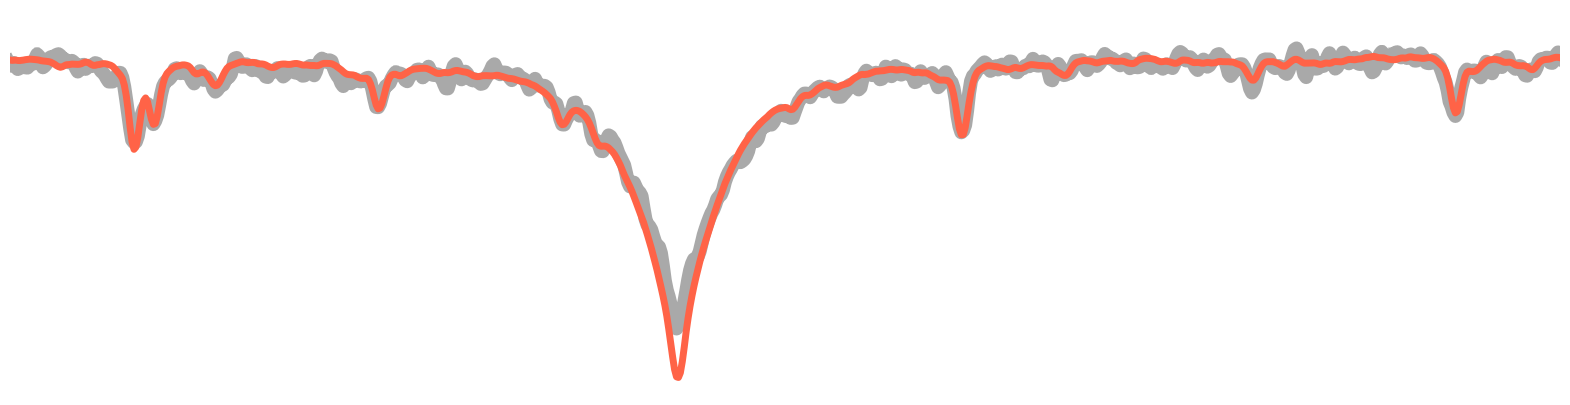

In [15]:
# step 1: how do I want these to look?
# it would be func to use different colors here...
figure(figsize=(20,5))
errorbar(gaia_spectrum.custom_model.w, active_dwarf_spec.flux+scale, yerr=active_dwarf_spec.sigma, 
             color='darkgrey', ecolor='gainsboro', elinewidth=4, zorder=1, linewidth=10)
plot(gaia_spectrum.custom_model.w, active_dwarf_spec.single_fit+scale, '-', zorder=2,
    color='tomato', linewidth=5, alpha=1)
# xlim(845,855)
xlim(851,859)
axis('off')

/var/folders/pk/t44zjr6913b62d97t1gt20680000gn/T/ipykernel_5755/3859447670.py:36: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plot(gaia_spectrum.custom_model.w, binary_flux, '-', zorder=n+4,


(851.0, 858.0)

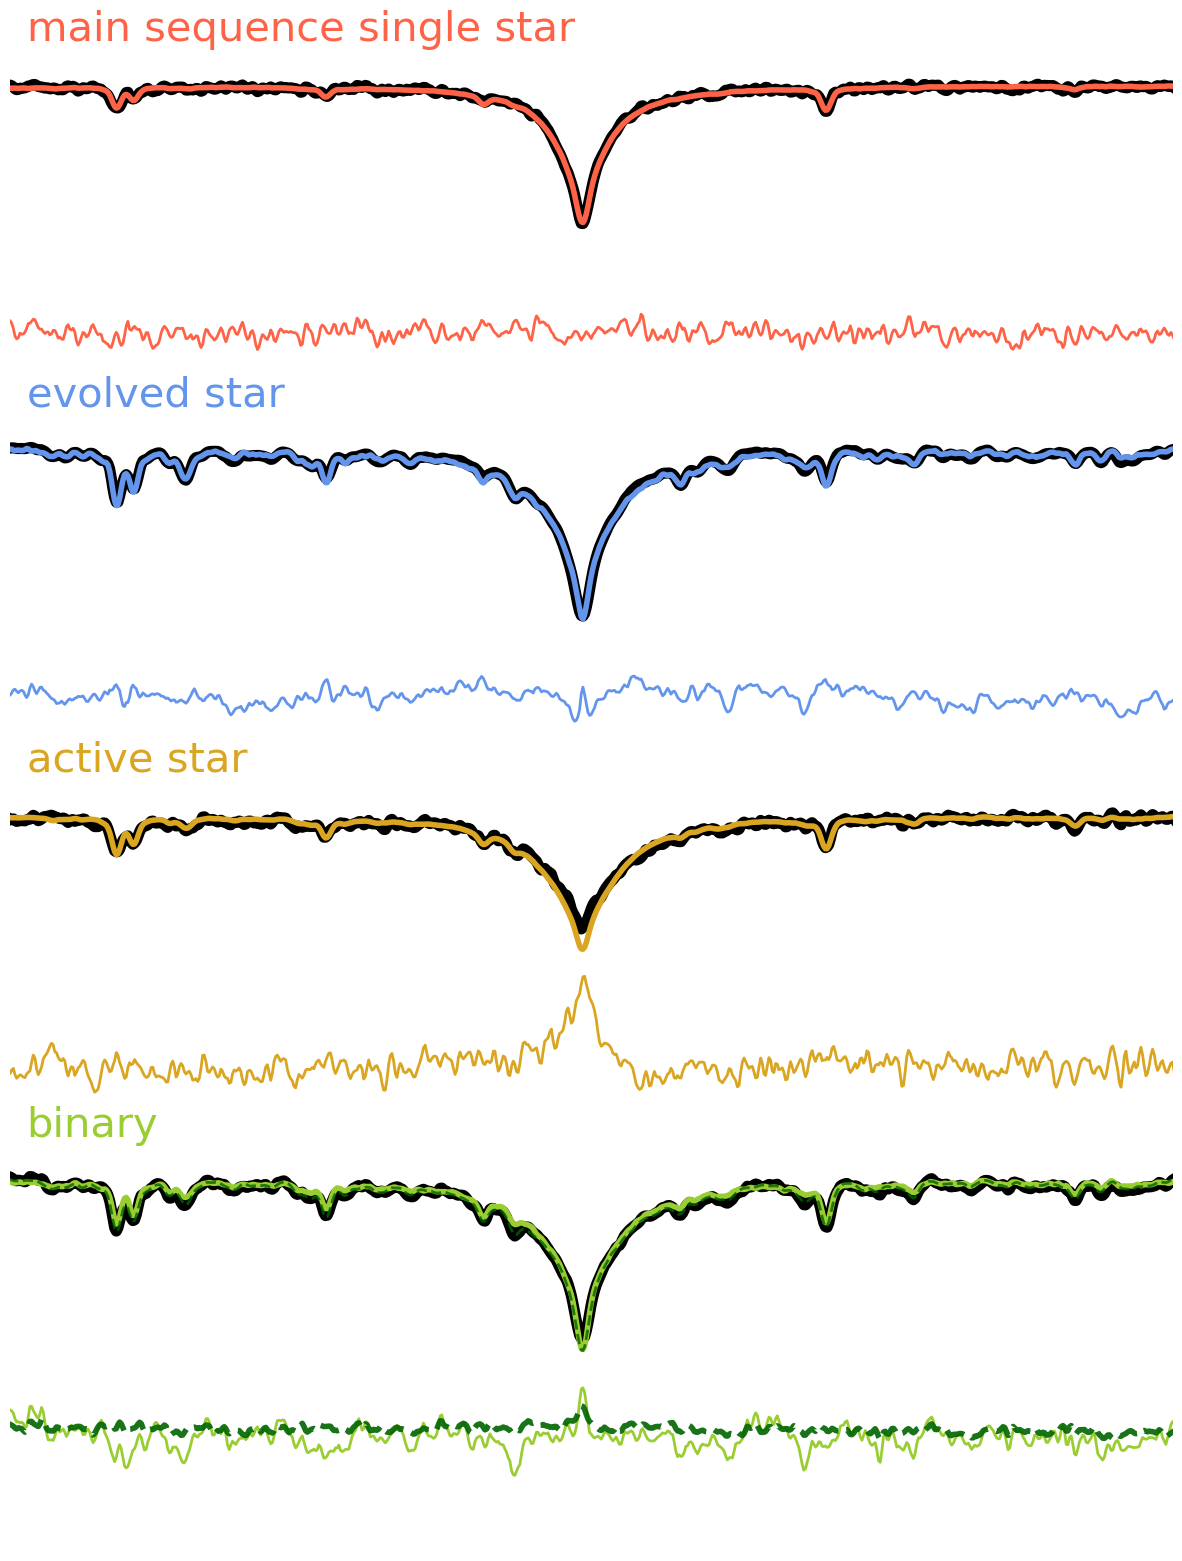

In [61]:
from matplotlib import cm
import cmasher as cmr

norm = matplotlib.colors.Normalize(vmin=-2, vmax=4)



oddball_spectra = [single_spec, evolved_star_spec, active_dwarf_spec, binary_spec]
oddball_labels = [
    'main sequence single star',
    'evolved star',
    'active star',
    'binary']

colors = ['tomato','cornflowerblue','goldenrod','yellowgreen']

rcParams['font.size']=13
figure(figsize=(15,20))
for n in range(len(oddball_spectra)):
    c = colors[n]#cmr.lilac_r(norm(n))
    oddball_spec = oddball_spectra[n]
    scale = 8*(5-n)
    text(851.1,scale+6,oddball_labels[n], color=c,fontsize=30)
    flux =  5*oddball_spec.flux+scale
    fit = 5*oddball_spec.single_fit+scale
    errorbar(gaia_spectrum.custom_model.w,flux, yerr=oddball_spec.sigma, 
             color='k', ecolor='gainsboro', elinewidth=4, zorder=n+2, linewidth=8)
    plot(gaia_spectrum.custom_model.w, fit, '-', zorder=n+3,
        color=c, linewidth=4, alpha=1)
    resid_scale = scale-0.4
    resid = 20*(oddball_spec.flux - oddball_spec.single_fit) + resid_scale
    plot(gaia_spectrum.custom_model.w, resid, '-', zorder=n+3,color=c,lw=2)
    if n==3:
        binary_flux = 5* oddball_spec.binary_fit+scale
        binary_resid = 10*(oddball_spec.flux- oddball_spec.binary_fit)+ resid_scale
        plot(gaia_spectrum.custom_model.w, binary_flux, '-', zorder=n+4,
        color='darkgreen', linewidth=2, alpha=0.8, ls='--')
        plot(
            gaia_spectrum.custom_model.w, 
             binary_resid, zorder=n+3,color='darkgreen',lw=4,alpha=0.9, ls='--')
xlim(gaia_spectrum.custom_model.w[0], gaia_spectrum.custom_model.w[-1])
axis('off')
xlim(851,858)

In [90]:
# I might need to choose another binary
# I need the spectra to be deeper too

In [ ]:
# now I need the colors